<a href="https://colab.research.google.com/github/ak1484/GoogleSEO/blob/master/GoogleSEO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install GoogleNews


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.4/293.4 KB 6.2 MB/s eta 0:00:00


In [ ]:
pip install newspaper3k


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 KB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 66.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13552 sha256=e85be097da0551dc9c3521e9841ed6222a1887ed07c349a8531fb3f1d0e99ce7
  Stored in directory: /root/.cache/pip/wheels/94/ad/df/a2a01300cea47d5695f242f7e925a805970106fd9e4b151468
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3356 sha256=0b48f54092806ee220cf68701fed6ba7c6d80fd11089dd63d45be

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from GoogleNews import GoogleNews
from newspaper import Article
from newspaper import Config
from wordcloud import WordCloud, STOPWORDS

nltk.download('vader_lexicon') #required for Sentiment Analysis

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
now = dt.date.today()
now = now.strftime('%m-%d-%Y')
yesterday = dt.date.today() - dt.timedelta(days = 1)
yesterday = yesterday.strftime('%m-%d-%Y')

nltk.download('punkt')
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:78.0) Gecko/20100101 Firefox/78.0'
config = Config()
config.browser_user_agent = user_agent
config.request_timeout = 10

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
number = int(input("Enter the number of assets/securities you want the news for: \n"))

n = 0
while n < number:
  asset = input("Please provide the name of the asset/security you want the data for: ")
  #As long as the asset name is valid, not empty...
  if asset != '':
      print(f'Searching for and analyzing {asset}, Please be patient, it might take a while...')

      #Extract News with Google News
      googlenews = GoogleNews(start=yesterday,end=now)
      googlenews.search(asset)
      result = googlenews.result()
      #store the results
      df = pd.DataFrame(result)
      print(df)

      n += 1

  try:
    list =[] #creating an empty list 
    for i in df.index:
        dict = {} #creating an empty dictionary to append an article in every single iteration
        article = Article(df['link'][i],config=config) #providing the link
        try:
          article.download() #downloading the article 
          article.parse() #parsing the article
          article.nlp() #performing natural language processing (nlp)
        except:
           pass 
        #storing results in our empty dictionary
        dict['Date']=df['date'][i] 
        dict['Media']=df['media'][i]
        dict['Title']=article.title
        dict['Article']=article.text
        dict['Summary']=article.summary
        dict['Key_words']=article.keywords
        list.append(dict)
    check_empty = not any(list)
    # print(check_empty)
    if check_empty == False:
      news_df=pd.DataFrame(list) #creating dataframe
      print(news_df)

  except Exception as e:
      #exception handling
      print("exception occurred:" + str(e))
      print('Looks like, there is some error in retrieving the data, Please try again or try with a different ticker.' )


Enter the number of assets/securities you want the news for: 
1
Please provide the name of the asset/security you want the data for: ipl
Searching for and analyzing ipl, Please be patient, it might take a while...
                                               title                 media  \
0  IPL 2023 rule change: teams will name their pl...          ESPNcricinfo   
1  IPL 2023 new rules: Playing XI, Impact Player ...       Hindustan Times   
2  IPL 2023 rule change: teams to announce their ...             The Hindu   
3  IPL 2023 live broadcast: Where to watch IPL 20...                  WION   
4  IPL 2023: Top 5 Batters To Watch Out For In In...              Zee News   
5  Buckle Up: Top 5 IPL Teams to Watch Out For in...               KreedOn   
6  Injured Shreyas Iyer doubtful starter for at l...          ESPNcricinfo   
7  Jonny Bairstow likely to skip IPL to focus on ...  a-sports.tv A Sports   
8  ‘I doubt if players will take breaks during IP...    The Indian Express   
9  IPL

Positive Sentiment: 7.00
Neutral Sentiment: 1.00
Negative Sentiment: 2.00


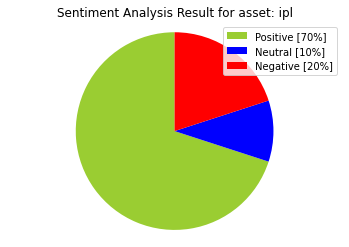

Wordcloud for ipl


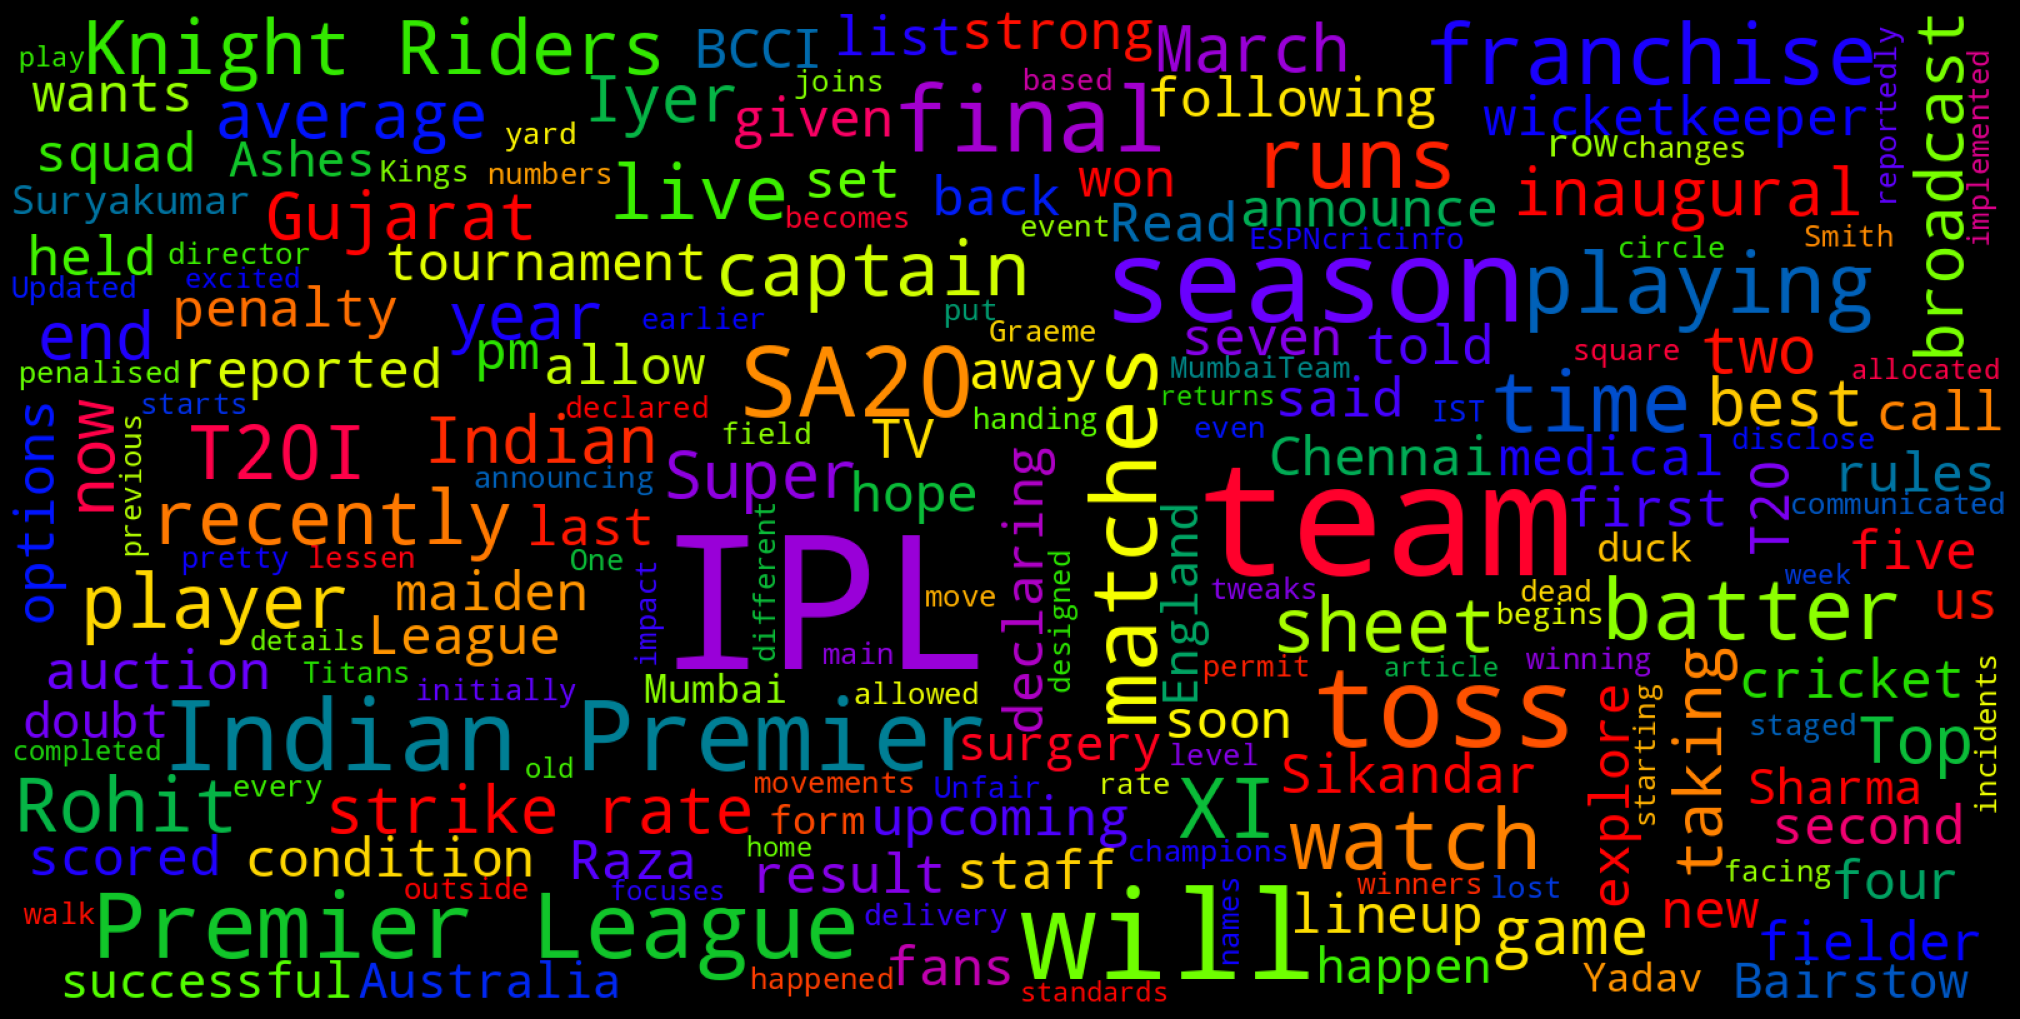

In [ ]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole)

#Assigning Initial Values
positive = 0
negative = 0
neutral = 0
#Creating empty lists
news_list = []
neutral_list = []
negative_list = []
positive_list = []

#Iterating over the tweets in the dataframe
for news in news_df['Summary']:
  news_list.append(news)
  analyzer = SentimentIntensityAnalyzer().polarity_scores(news)
  neg = analyzer['neg']
  neu = analyzer['neu']
  pos = analyzer['pos']
  comp = analyzer['compound']

  if neg > pos:
    negative_list.append(news) #appending the news that satisfies this condition
    negative += 1 #increasing the count by 1
  elif pos > neg:
    positive_list.append(news) #appending the news that satisfies this condition
    positive += 1 #increasing the count by 1
  elif pos == neg:
    neutral_list.append(news) #appending the news that satisfies this condition
    neutral += 1 #increasing the count by 1 

      
positive = percentage(positive, len(news_df)) #percentage is the function defined above
negative = percentage(negative, len(news_df))
neutral = percentage(neutral, len(news_df))

#Converting lists to pandas dataframe
news_list = pd.DataFrame(news_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
#using len(length) function for counting
print("Positive Sentiment:", '%.2f' % len(positive_list), end='\n')
print("Neutral Sentiment:", '%.2f' % len(neutral_list), end='\n')
print("Negative Sentiment:", '%.2f' % len(negative_list), end='\n')

#Creating PieCart
labels = ['Positive ['+str(round(positive))+'%]' , 'Neutral ['+str(round(neutral))+'%]','Negative ['+str(round(negative))+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for asset: "+asset+"" )
plt.axis('equal')
plt.show()

# Word cloud visualization
def word_cloud(text):
  stopwords = set(STOPWORDS)
  allWords = ' '.join([nws for nws in text])
  wordCloud = WordCloud(background_color='black',width = 1600, height = 800,stopwords = stopwords,min_font_size = 20,max_font_size=150,colormap='prism').generate(allWords)
  fig, ax = plt.subplots(figsize=(20,10), facecolor='k')
  plt.imshow(wordCloud)
  ax.axis("off")
  fig.tight_layout(pad=0)
  plt.show()

print('Wordcloud for ' + asset)
word_cloud(news_df['Summary'].values)